<h1 style="background-color: #0D0C1D; border-radius: 8px; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; font-size: 48px; font-weight: bold; padding: 15px; text-align: center;">Practical Application Assignment II: What Drives the Price of a Car?</h1>
<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 20px 30px;">
    <center>
        <img src=images/kurt.jpeg width=50% />
    </center>
</div>

<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Overview</b></h2>
    <p>In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing. Your goal is to understand what factors make a car more or less expensive. As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.</p>
</div>

<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>CRISP-DM Framework</b></h2>
    <center>
        <img src=images/crisp.png width=50% />
    </center>
    <p>To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM. This process provides a framework for working through a data problem. Your first step in this application will be to read through a brief overview of CRISP-DM <a href="https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip">here</a>. After reading the overview, answer the questions below.</p>
</div>

##
<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Business Understanding</b></h2>
    <p>From a business perspective, we are tasked with identifying key drivers for used car prices. In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition. Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.</p>
</div>

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <p>The objective is to develop a predictive model that can accurately estimate the price of a used car based on its features. This information will be provided to a car dealership to help them gain a better understanding of how and why certain factors increase or decrease the price of a used car so that they can make more informed and data-driven decisions and maximize their profits. The dataset consists of 426,880 instances, each representing a used car, and 18 features including the car's region, year of manufacture, manufacturer, model, condition, number of cylinders, fuel type, odometer reading, title status, transmission type, VIN, drivetrain, size, type, paint color, and state. The target variable for the model is the 'price' of the vehicle. The model should be able to capture the relationship between the features and the price, enabling us to identify which features are most influential in determining the price of a used car. The model's performance can be evaluated using metrics such as RMSE (Root Mean Square Error) or MAE (Mean Absolute Error) to ensure its accuracy in predicting used car prices.</p>
</div>

##
<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Data Understanding</b></h2>
    <p>After considering the business understanding, we want to get familiar with our data. Write down some steps that you would take to get to know the dataset and identify any quality issues within. Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.</p>
</div>

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <ul>
        <b>Data Exploration</b>
        <ul>
            <li>View the first few rows of the dataset to understand the structure and column names.</li>
            <li>Display basic information about the dataset using the info() function.</li>
            <li>Generate summary statistics for each column (mean, median, standard deviation, etc.) to understand the distribution of numerical features.</li>
            <li>Check the unique values in categorical columns to understand the diversity and range of categories.</li>
        </ul>
        <b>Data Quality Assessment</b>
        <ul>
            <li>Identify columns with missing values and check the extent of missing values.</li>
            <li>Identify outliers in the data.</li>
            <li>Check for inconsistencies in categorical columns, such as different spellings or capitalization of the same category.</li>
            <li>Count duplicate rows.</li>
        </ul>
        <b>Data Visualization</b>
        <ul>
            <li>Plot histograms for numerical features to visualize the distribution of values.</li>
            <li>Use bar charts to visualize the distribution of categorical features.</li>
            <li>Create scatter plots to explore relationships between numerical features and the target variable (price).</li>
            <li>Any other plots that may be useful to visualize and help better understand the data.</li>
        </ul>
    </ul>
</div>

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data/vehicles.csv')

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Data Exploration</b></h3>
</div>

In [2]:
# Display the first 5 rows of the dataset
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
# Let's convert column names to title case & remove spaces & underscores
column_names = ['ID', 'Region', 'Price', 'Year', 'Manufacturer', 'Model', 'Condition', 'Cylinders', 'Fuel', 'Odometer', 'TitleStatus', 'Transmission', 'VIN', 'Drive', 'Size', 'Type', 'PaintColor', 'State']
data.columns = column_names

In [4]:
data.head()

,ID,Region,Price,Year,Manufacturer,Model,Condition,Cylinders,Fuel,Odometer,TitleStatus,Transmission,VIN,Drive,Size,Type,PaintColor,State
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
# Drop the 'ID' column as it won't be needed
data.drop('ID', inplace=True, axis=1)

# Will also drop 'VIN' as it's basically another 'ID'
data.drop('VIN', inplace=True, axis=1)

In [6]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Region        426880 non-null  object 
 1   Price         426880 non-null  int64  
 2   Year          425675 non-null  float64
 3   Manufacturer  409234 non-null  object 
 4   Model         421603 non-null  object 
 5   Condition     252776 non-null  object 
 6   Cylinders     249202 non-null  object 
 7   Fuel          423867 non-null  object 
 8   Odometer      422480 non-null  float64
 9   TitleStatus   418638 non-null  object 
 10  Transmission  424324 non-null  object 
 11  Drive         296313 non-null  object 
 12  Size          120519 non-null  object 
 13  Type          334022 non-null  object 
 14  PaintColor    296677 non-null  object 
 15  State         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [7]:
# Display the summary statistics of the dataset
data.describe()

,Price,Year,Odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Analysis</b></h4>
    <ul>
        <li>There are large discrepancies between the min/max and 25th/75th percentile values for the price, year, and odometer columns. This indicates that there may be outliers in these columns that we can remove later.</li>
    </ul>
</div>

In [8]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Region', 'Manufacturer', 'Model', 'Condition', 'Cylinders', 'Fuel', 'TitleStatus', 'Transmission', 'Drive', 'Size', 'Type', 'PaintColor', 'State']
Numerical Features: ['Price', 'Year', 'Odometer']


In [9]:
# Get the number of unique values in the categorical features
for feature in categorical_features:
    print(f"Number of Unique Values in {feature}: {data[feature].nunique()}")

Number of Unique Values in Region: 404
Number of Unique Values in Manufacturer: 42
Number of Unique Values in Model: 29649
Number of Unique Values in Condition: 6
Number of Unique Values in Cylinders: 8
Number of Unique Values in Fuel: 5
Number of Unique Values in TitleStatus: 6
Number of Unique Values in Transmission: 3
Number of Unique Values in Drive: 3
Number of Unique Values in Size: 4
Number of Unique Values in Type: 13
Number of Unique Values in PaintColor: 12
Number of Unique Values in State: 51


In [10]:
# Get the unique values of the categorical features
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in Region: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 

In [11]:
# Let's try to clean up the data a bit

# Capitalize all words in 'Region'; if letter is already uppercase, leave it alone
def capitalize_words(text):
    return re.sub(r'\b[a-z]', lambda match: match.group().upper(), text)

data['Region'] = data['Region'].apply(capitalize_words)

# Print unique values in 'Region' to verify
print(data['Region'].unique())

['Prescott' 'Fayetteville' 'Florida Keys' 'Worcester / Central MA'
 'Greensboro' 'Hudson Valley' 'Medford-Ashland' 'Erie' 'El Paso'
 'Bellingham' 'Skagit / Island / SJI' 'La Crosse' 'Auburn' 'Birmingham'
 'Dothan' 'Florence / Muscle Shoals' 'Gadsden-Anniston'
 'Huntsville / Decatur' 'Mobile' 'Montgomery' 'Tuscaloosa'
 'Anchorage / Mat-Su' 'Fairbanks' 'Kenai Peninsula' 'Southeast Alaska'
 'Flagstaff / Sedona' 'Mohave County' 'Phoenix' 'Show Low' 'Sierra Vista'
 'Tucson' 'Yuma' 'Fort Smith' 'Jonesboro' 'Little Rock' 'Texarkana'
 'Bakersfield' 'Chico' 'Fresno / Madera' 'Gold Country' 'Hanford-Corcoran'
 'Humboldt County' 'Imperial County' 'Inland Empire' 'Los Angeles'
 'Mendocino County' 'Merced' 'Modesto' 'Monterey Bay' 'Orange County'
 'Palm Springs' 'Redding' 'Reno / Tahoe' 'Sacramento' 'San Diego'
 'San Luis Obispo' 'Santa Barbara' 'Santa Maria' 'SF Bay Area'
 'Siskiyou County' 'Stockton' 'Susanville' 'Ventura County'
 'Visalia-Tulare' 'Yuba-Sutter' 'Boulder' 'Colorado Springs' 'Denve

In [12]:
# Moving on to 'Manufacturer'

# First let's remove all rows with 'harley-davidson' in 'Manufacturer' since they don't make cars
data = data[data['Manufacturer'] != 'harley-davidson']

# Title case all manufacturer names; change 'alfa-romeo' to 'Alfa Romeo', 'aston-martin'
# to 'Aston Martin', 'bmw' to 'BMW', 'gmc' to 'GMC', 'mercedes-benz' to 'Mercedes-Benz', 'rover' to 'Land Rover'

def title_case_manufacturer(text):
    if pd.isnull(text) or text == '':
        return text
    if text == 'alfa-romeo':
        return 'Alfa Romeo'
    if text == 'aston-martin':
        return 'Aston Martin'
    if text == 'bmw':
        return 'BMW'
    if text == 'gmc':
        return 'GMC'
    if text == 'mercedes-benz':
        return 'Mercedes-Benz'
    if text == 'rover':
        return 'Land Rover'
    return text.title()

data['Manufacturer'] = data['Manufacturer'].apply(title_case_manufacturer)

# Print unique values in 'Manufacturer' to verify
print(data['Manufacturer'].unique())

[nan 'GMC' 'Chevrolet' 'Toyota' 'Ford' 'Jeep' 'Nissan' 'Ram' 'Mazda'
 'Cadillac' 'Honda' 'Dodge' 'Lexus' 'Jaguar' 'Buick' 'Chrysler' 'Volvo'
 'Audi' 'Infiniti' 'Lincoln' 'Alfa Romeo' 'Subaru' 'Acura' 'Hyundai'
 'Mercedes-Benz' 'BMW' 'Mitsubishi' 'Volkswagen' 'Porsche' 'Kia'
 'Land Rover' 'Ferrari' 'Mini' 'Pontiac' 'Fiat' 'Tesla' 'Saturn' 'Mercury'
 'Datsun' 'Aston Martin' 'Morgan']


In [13]:
# Title case 'Condition', 'Cylinders', 'Fuel', 'TitleStatus', 'Transmission', 'Size', 'Type', 'PaintColor'
data['Condition'] = data['Condition'].apply(lambda x: x.title() if pd.notnull(x) else x)
data['Cylinders'] = data['Cylinders'].apply(lambda x: x.title() if pd.notnull(x) else x)
data['Fuel'] = data['Fuel'].apply(lambda x: x.title() if pd.notnull(x) else x)
data['TitleStatus'] = data['TitleStatus'].apply(lambda x: x.title() if pd.notnull(x) else x)
data['Transmission'] = data['Transmission'].apply(lambda x: x.title() if pd.notnull(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.title() if pd.notnull(x) else x)
data['Type'] = data['Type'].apply(lambda x: x.title() if pd.notnull(x) else x)
data['PaintColor'] = data['PaintColor'].apply(lambda x: x.title() if pd.notnull(x) else x)

# Make 'Drive', 'State' all caps
data['Drive'] = data['Drive'].apply(lambda x: x.upper() if pd.notnull(x) else x)
data['State'] = data['State'].apply(lambda x: x.upper() if pd.notnull(x) else x)

In [14]:
# Confirm changes
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in Region: ['Prescott' 'Fayetteville' 'Florida Keys' 'Worcester / Central MA'
 'Greensboro' 'Hudson Valley' 'Medford-Ashland' 'Erie' 'El Paso'
 'Bellingham' 'Skagit / Island / SJI' 'La Crosse' 'Auburn' 'Birmingham'
 'Dothan' 'Florence / Muscle Shoals' 'Gadsden-Anniston'
 'Huntsville / Decatur' 'Mobile' 'Montgomery' 'Tuscaloosa'
 'Anchorage / Mat-Su' 'Fairbanks' 'Kenai Peninsula' 'Southeast Alaska'
 'Flagstaff / Sedona' 'Mohave County' 'Phoenix' 'Show Low' 'Sierra Vista'
 'Tucson' 'Yuma' 'Fort Smith' 'Jonesboro' 'Little Rock' 'Texarkana'
 'Bakersfield' 'Chico' 'Fresno / Madera' 'Gold Country' 'Hanford-Corcoran'
 'Humboldt County' 'Imperial County' 'Inland Empire' 'Los Angeles'
 'Mendocino County' 'Merced' 'Modesto' 'Monterey Bay' 'Orange County'
 'Palm Springs' 'Redding' 'Reno / Tahoe' 'Sacramento' 'San Diego'
 'San Luis Obispo' 'Santa Barbara' 'Santa Maria' 'SF Bay Area'
 'Siskiyou County' 'Stockton' 'Susanville' 'Ventura County'
 'Visalia-Tulare' 'Yuba-Sutter' 'Boulder' 

In [15]:
# Save cleaned data to a new CSV file
data.to_csv('data/vehicles_cleaned_01.csv', index=False)

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Data Quality Assessment</b></h3>
</div>

In [16]:
# Find number of missing values in each column
data.isnull().sum()

Region               0
Price                0
Year              1205
Manufacturer     17646
Model             5265
Condition       174035
Cylinders       177581
Fuel              3009
Odometer          4400
TitleStatus       8242
Transmission      2542
Drive           130477
Size            306252
Type             92802
PaintColor      130163
State                0
dtype: int64

In [17]:
# Calculate missing values for each column as percentage of the total number of rows
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

Region           0.00
Price            0.00
Year             0.28
Manufacturer     4.14
Model            1.23
Condition       40.78
Cylinders       41.61
Fuel             0.71
Odometer         1.03
TitleStatus      1.93
Transmission     0.60
Drive           30.58
Size            71.77
Type            21.75
PaintColor      30.50
State            0.00
dtype: float64


<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Analysis</b></h4>
    <ul>
        <li>Later on, we can remove rows in columns with less than about 5% of their rows missing.</li>
    </ul>
</div>

In [18]:
# Find number of rows in the dataset
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 426727


In [19]:
# Find number of duplicate rows in the dataset
print("Number of Duplicate Rows in the Dataset:", data.duplicated().sum())

Number of Duplicate Rows in the Dataset: 56395


<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Analysis</b></h4>
    <ul>
        <li>We'll remove duplicate rows in the data preparation phase.</li>
    </ul>
</div>

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Data Visualization</b></h3>
</div>

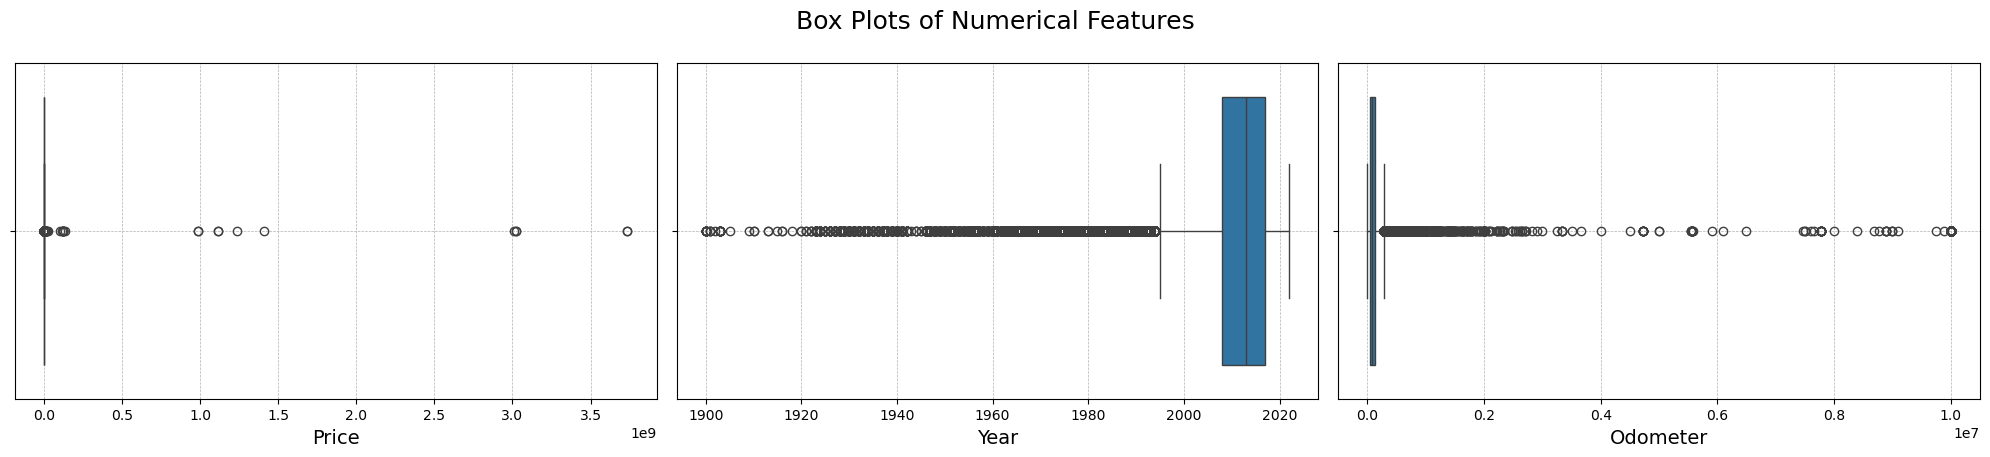

In [20]:
# Box plots for numerical features to visually inspect for outliers
plt.figure(figsize=(20, 20))
plt.suptitle("Box Plots of Numerical Features", fontsize=18, y=1.0)
for col in range(len(numerical_features)):
    plt.subplot(5, 3, col+1)
    sns.boxplot(x=data[numerical_features[col]])
    plt.xlabel(numerical_features[col], fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/01-box-plots.png', bbox_inches='tight', dpi=300)
plt.show()

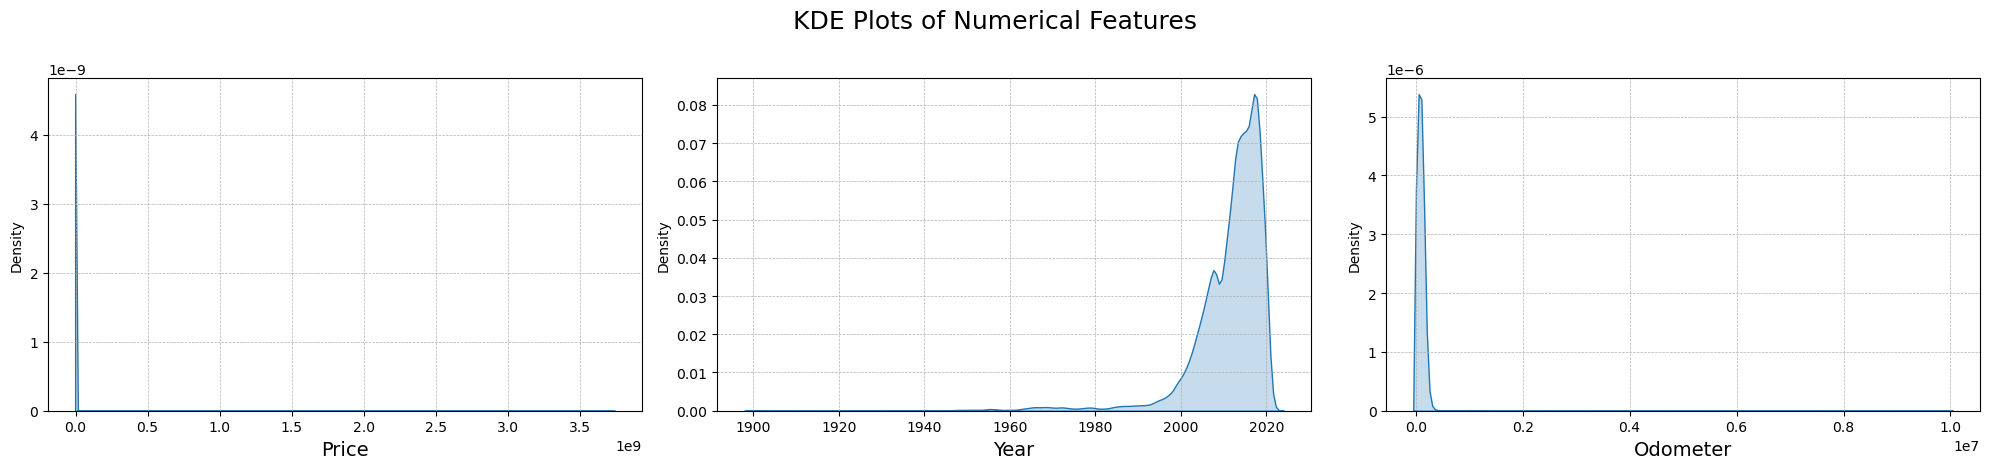

In [21]:
# KDE plots of numerical features to further identify outliers
plt.figure(figsize=(20, 20))
plt.suptitle("KDE Plots of Numerical Features", fontsize=18, y=1.0)
for col in range(len(numerical_features)):
    plt.subplot(5, 3, col+1)
    sns.kdeplot(x=data[numerical_features[col]], shade=True)
    plt.xlabel(numerical_features[col], fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/02-kde-plots.png', bbox_inches='tight', dpi=300)
plt.show()

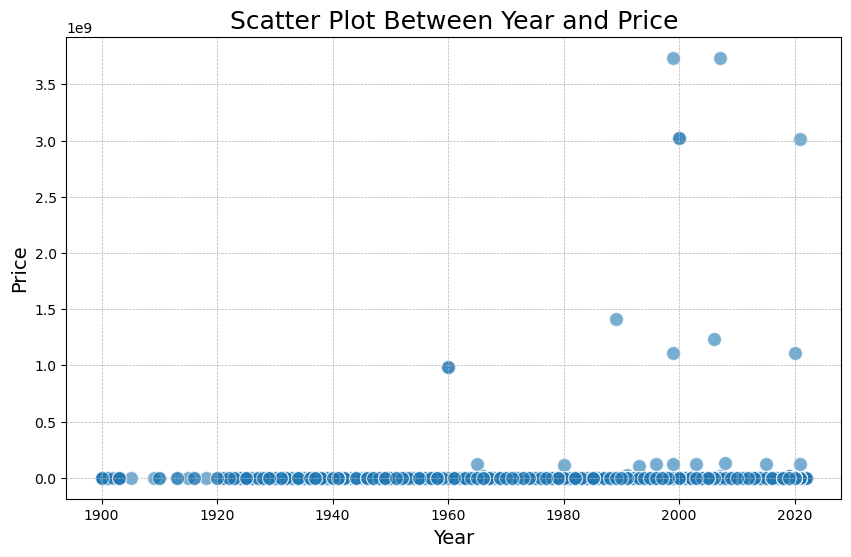

In [22]:
# Analyzing specific features more deeply with scatter plots with reference to price

# Scatter plot between price and year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=data, palette="viridis", s=100, alpha=0.6, edgecolor='w')
plt.title('Scatter Plot Between Year and Price', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('images/03-scatter-year-price.png', bbox_inches='tight', dpi=300)
plt.show()

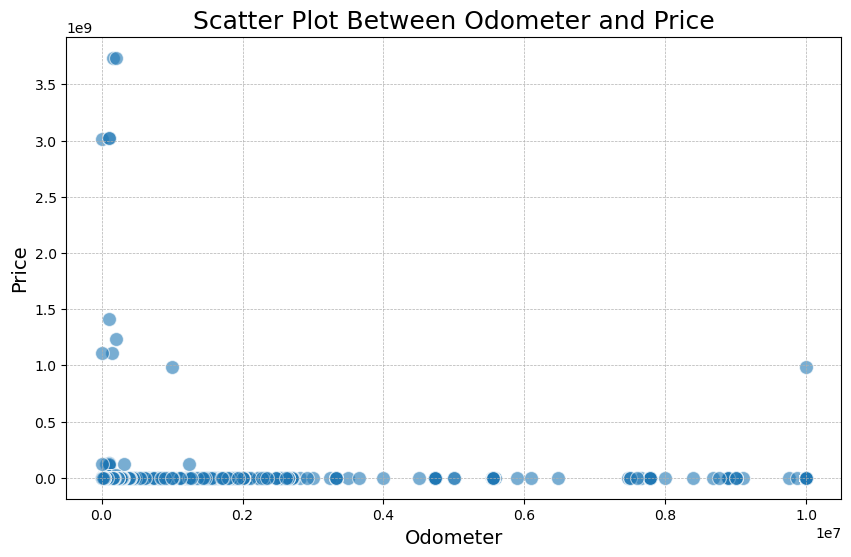

In [23]:
# Scatter plot between price and odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Odometer', y='Price', data=data, palette="viridis", s=100, alpha=0.6, edgecolor='w')
plt.title('Scatter Plot Between Odometer and Price', fontsize=18)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('images/04-scatter-odometer-price.png', bbox_inches='tight', dpi=300)
plt.show()

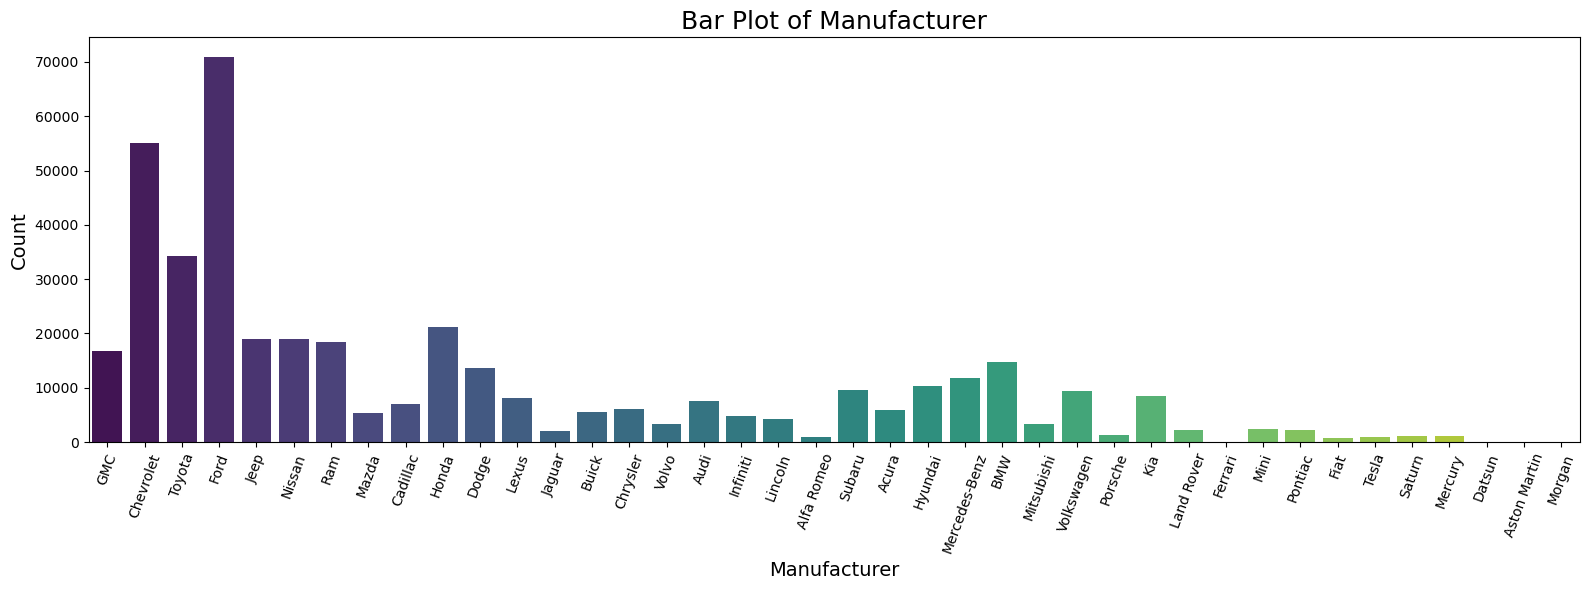

In [24]:
# Various bar plots of the categorical features

# Bar plot of manufacturer
plt.figure(figsize=(16, 6))
sns.countplot(x='Manufacturer', data=data, palette="viridis")
plt.title('Bar Plot of Manufacturer', fontsize=18)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('images/05-bar-manufacturer.png', bbox_inches='tight', dpi=300)
plt.show()

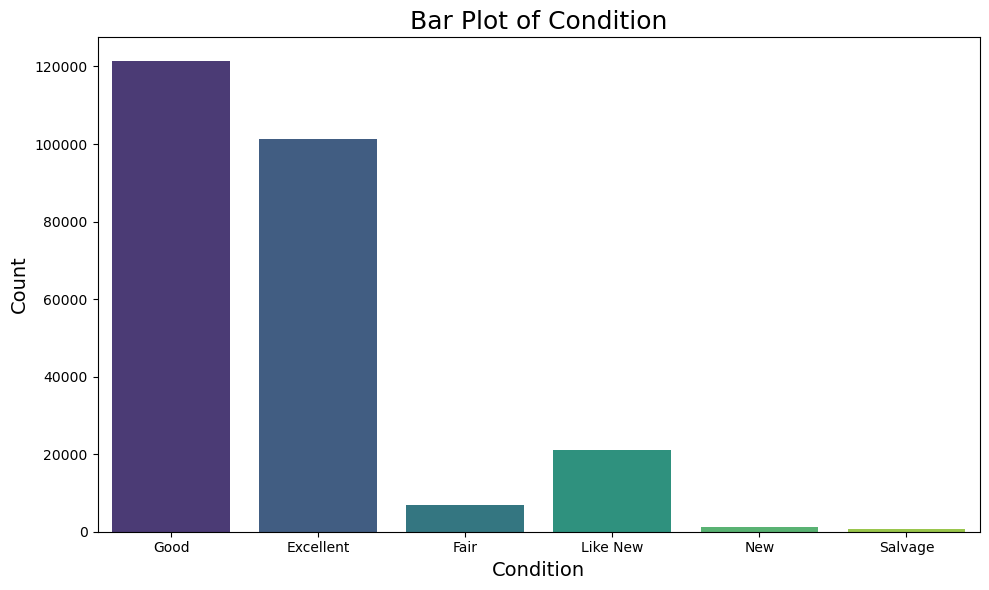

In [25]:
# Bar plot of condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Condition', data=data, palette="viridis")
plt.title('Bar Plot of Condition', fontsize=18)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/06-bar-condition.png', bbox_inches='tight', dpi=300)
plt.show()

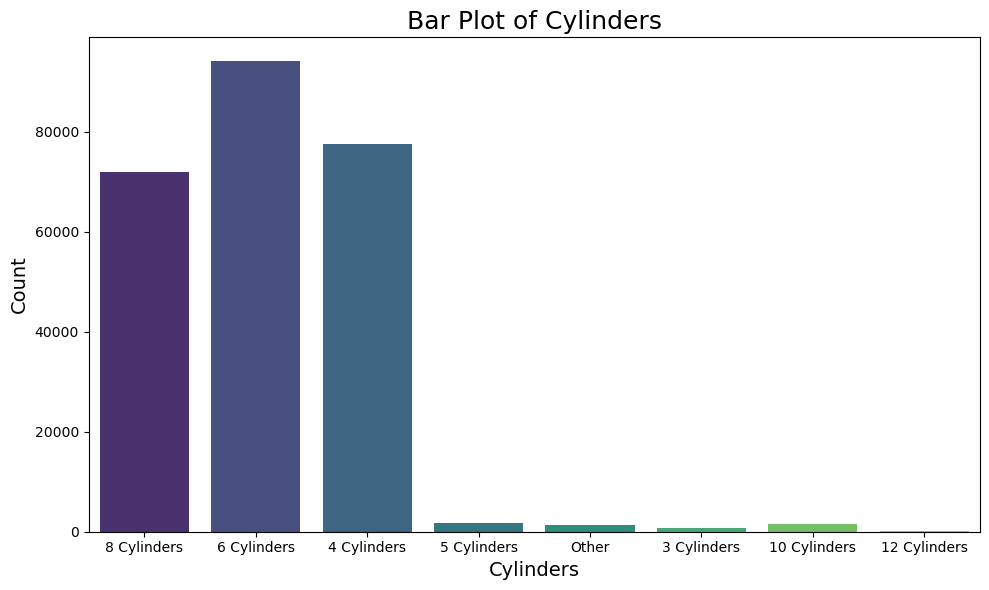

In [26]:
# Bar plot of cylinders
plt.figure(figsize=(10, 6))
sns.countplot(x='Cylinders', data=data, palette="viridis")
plt.title('Bar Plot of Cylinders', fontsize=18)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/07-bar-cylinders.png', bbox_inches='tight', dpi=300)
plt.show()

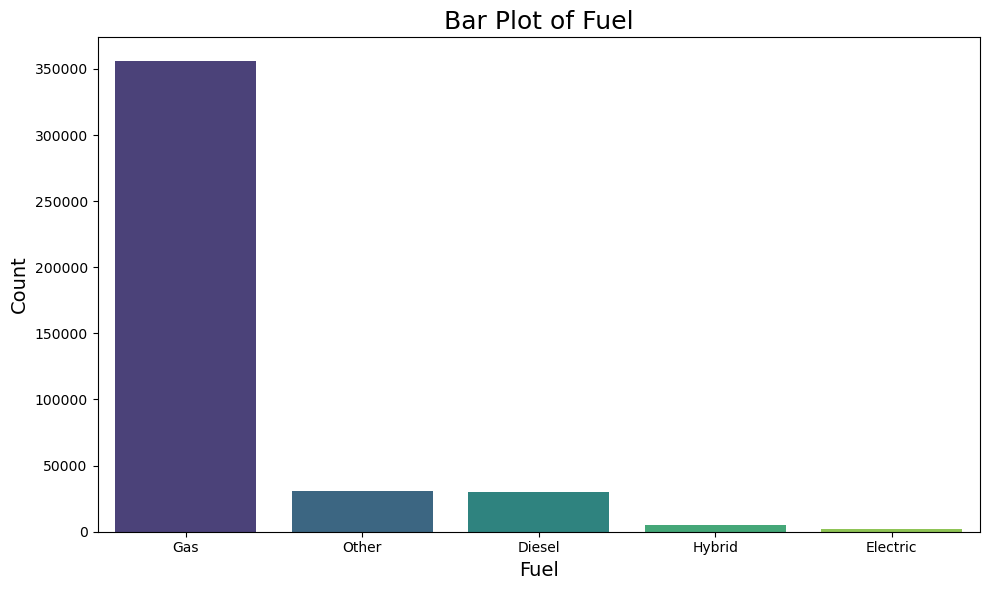

In [27]:
# Bar plot of fuel
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel', data=data, palette="viridis")
plt.title('Bar Plot of Fuel', fontsize=18)
plt.xlabel('Fuel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/08-bar-fuel.png', bbox_inches='tight', dpi=300)
plt.show()

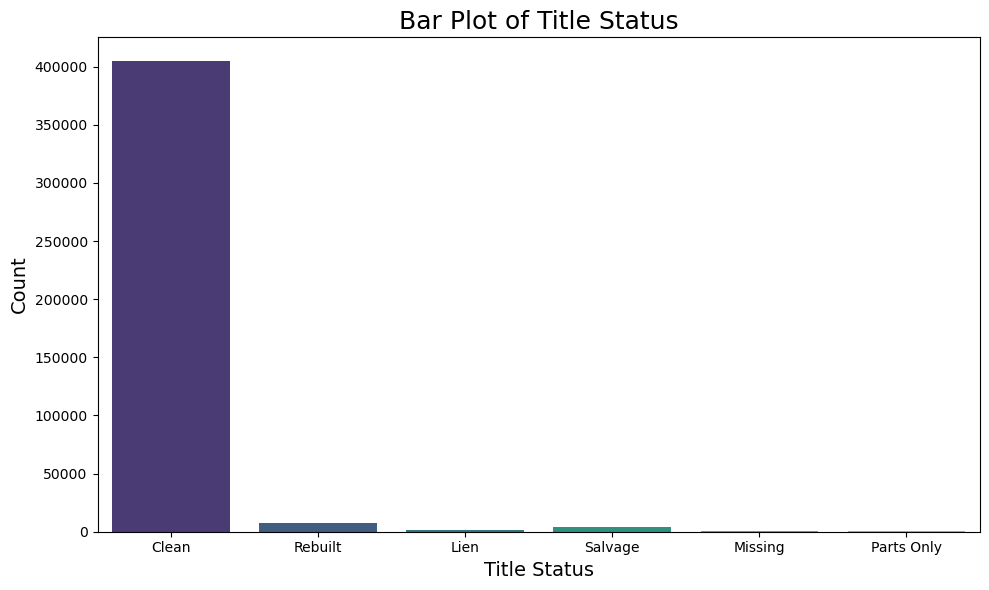

In [28]:
# Bar plot of title_status
plt.figure(figsize=(10, 6))
sns.countplot(x='TitleStatus', data=data, palette="viridis")
plt.title('Bar Plot of Title Status', fontsize=18)
plt.xlabel('Title Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/09-bar-title-status.png', bbox_inches='tight', dpi=300)
plt.show()

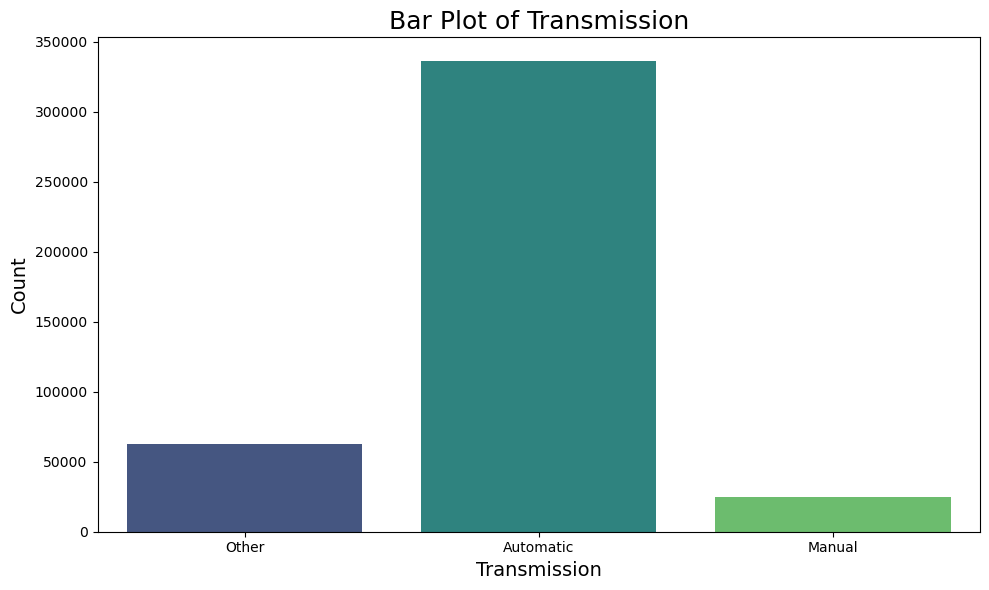

In [29]:
# Bar plot of transmission
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=data, palette="viridis")
plt.title('Bar Plot of Transmission', fontsize=18)
plt.xlabel('Transmission', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/10-bar-transmission.png', bbox_inches='tight', dpi=300)
plt.show()

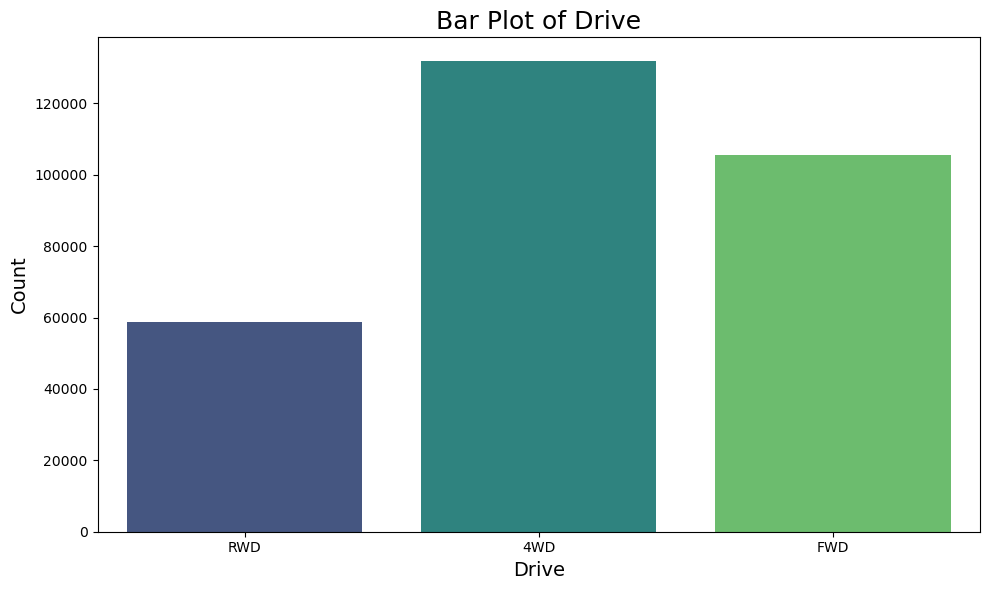

In [30]:
# Bar plot of drive
plt.figure(figsize=(10, 6))
sns.countplot(x='Drive', data=data, palette="viridis")
plt.title('Bar Plot of Drive', fontsize=18)
plt.xlabel('Drive', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/11-bar-drive.png', bbox_inches='tight', dpi=300)
plt.show()

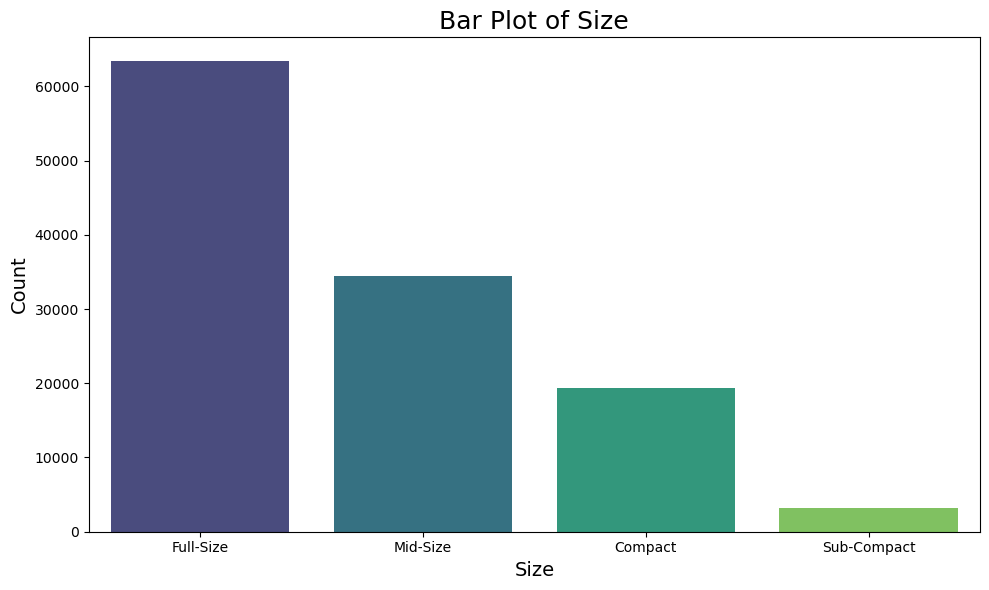

In [31]:
# Bar plot of size
plt.figure(figsize=(10, 6))
sns.countplot(x='Size', data=data, palette="viridis")
plt.title('Bar Plot of Size', fontsize=18)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/12-bar-size.png', bbox_inches='tight', dpi=300)
plt.show()

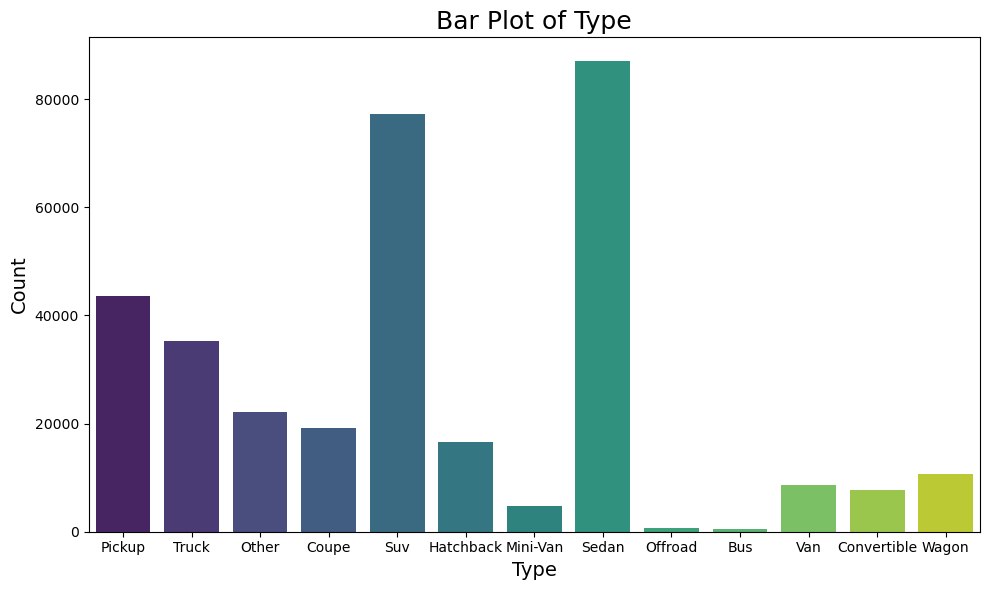

In [32]:
# Bar plot of type
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=data, palette="viridis")
plt.title('Bar Plot of Type', fontsize=18)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.savefig('images/13-bar-type.png', bbox_inches='tight', dpi=300)
plt.show()

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Analysis</b></h4>
    <ul>
        <li>The dataset contains information about 426,880 used cars, with 18 features for each car:</li>
        <ul>
            <li><strong>id:</strong> Unique identifier for each car (numerical).</li>
            <li><strong>region:</strong> Region where the car is located (categorical).</li>
            <li><strong>price:</strong> Price of the car (numerical).</li>
            <li><strong>year:</strong> Year the car was built (numerical).</li>
            <li><strong>manufacturer:</strong> Manufacturer of the car (categorical).</li>
            <li><strong>model:</strong> Model of the car (categorical).</li>
            <li><strong>condition:</strong> Condition of the car (categorical).</li>
            <li><strong>cylinders:</strong> Number of cylinders in the car (categorical).</li>
            <li><strong>fuel:</strong> Type of fuel the car uses (categorical).</li>
            <li><strong>odometer:</strong> Odometer reading of the car (numerical).</li>
            <li><strong>title_status:</strong> Title status of the car (categorical).</li>
            <li><strong>transmission:</strong> Transmission type of the car (categorical).</li>
            <li><strong>VIN:</strong> Vehicle Identification Number (categorical).</li>
            <li><strong>drive:</strong> Drivetrain of the car (categorical).</li>
            <li><strong>size:</strong> Size of the car (categorical).</li>
            <li><strong>type:</strong> Type of car (categorical).</li>
            <li><strong>paint_color:</strong> Paint color of the car (categorical).</li>
            <li><strong>state:</strong> State where the car is located (categorical).</li>
        </ul>
        <li>There were 56,202 duplicate rows in the dataset, and after removal there are now a total of 370,678 unique rows in the dataset.</li>
        <li>There are a number of missing values in the dataset:</li><br />
        <div style="padding-left: 20px;">
            <table>
                <tbody>
                    <tr>
                        <th>Feature</th>
                        <th># Missing</th>
                        <th>% Missing</th>
                    </tr>
                    <tr>
                        <td>Region</td>
                        <td>0</td>
                        <td>0.00</td>
                    </tr>
                    <tr>
                        <td>Price</td>
                        <td>0</td>
                        <td>0.00</td>
                    </tr>
                    <tr>
                        <td>Year</td>
                        <td>1205</td>
                        <td>0.28</td>
                    </tr>
                    <tr>
                        <td>Manufacturer</td>
                        <td>17646</td>
                        <td>4.14</td>
                    </tr>
                    <tr>
                        <td>Model</td>
                        <td>5265</td>
                        <td>1.23</td>
                    </tr>
                    <tr>
                        <td>Condition</td>
                        <td>174035</td>
                        <td>40.78</td>
                    </tr>
                    <tr>
                        <td>Cylinders</td>
                        <td>177581</td>
                        <td>41.61</td>
                    </tr>
                    <tr>
                        <td>Fuel</td>
                        <td>3009</td>
                        <td>0.71</td>
                    </tr>
                    <tr>
                        <td>Odometer</td>
                        <td>4400</td>
                        <td>1.03</td>
                    </tr>
                    <tr>
                        <td>TitleStatus</td>
                        <td>8242</td>
                        <td>1.93</td>
                    </tr>
                    <tr>
                        <td>Transmission</td>
                        <td>2542</td>
                        <td>0.60</td>
                    </tr>
                    <tr>
                        <td>Drive</td>
                        <td>130477</td>
                        <td>30.58</td>
                    </tr>
                    <tr>
                        <td>Size</td>
                        <td>306252</td>
                        <td>71.77</td>
                    </tr>
                    <tr>
                        <td>Type</td>
                        <td>92802</td>
                        <td>21.75</td>
                    </tr>
                    <tr>
                        <td>PaintColor</td>
                        <td>130163</td>
                        <td>30.50</td>
                    </tr>
                    <tr>
                        <td>State</td>
                        <td>0</td>
                        <td>0.00</td>
                    </tr>
                </tbody>
            </table>
        </div>
        <p style="padding-left: 20px;">This suggests that we will need to handle missing data as part of our data preparation process.</p>
        <li>We've also identified several items that can be dropped from the dataset in the next phase: duplicate rows, outliers, irrelevant features, etc.</li>
    </ul>
</div>

##
<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Data Preparation</b></h2>
    <p>After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.</p>
</div>

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Drop Unneeded Columns</b></h3>
</div>

In [33]:
# We've already dropped the 'ID' and 'VIN' columns
# We can also drop the 'size' column as it has a lot of missing values and doesn't really give us much important information
data.drop(['Size'], inplace=True, axis=1)

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Drop Duplicate Rows</b></h3>
</div>

In [34]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True)

# Count total number of rows after dropping duplicates
print("Number of Rows in the Dataset after Dropping Duplicates:", data.shape[0])

Number of Rows in the Dataset after Dropping Duplicates: 370256


In [35]:
# Summary statistics after dropping unneeded columns and duplicates
data.describe()

,Price,Year,Odometer
count,3.702560e+05,369270.000000,3.668100e+05
mean,8.423635e+04,2011.078585,9.716781e+04
std,1.308060e+07,9.804203,2.117475e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.568900e+04
50%,1.435000e+04,2013.000000,8.350000e+04
75%,2.699000e+04,2017.000000,1.332540e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [36]:
# Number of missing values after dropping unneeded columns and duplicates
data.isnull().sum()

Region               0
Price                0
Year               986
Manufacturer     15219
Model             4670
Condition       141101
Cylinders       150580
Fuel              2433
Odometer          3446
TitleStatus       6697
Transmission      2024
Drive           112324
Type             78774
PaintColor      108621
State                0
dtype: int64

In [37]:
# Percentage of missing values after dropping unneeded columns and duplicates
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

Region           0.00
Price            0.00
Year             0.27
Manufacturer     4.11
Model            1.26
Condition       38.11
Cylinders       40.67
Fuel             0.66
Odometer         0.93
TitleStatus      1.81
Transmission     0.55
Drive           30.34
Type            21.28
PaintColor      29.34
State            0.00
dtype: float64


###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Handle Missing Values & Remove Outliers</b></h3>
</div>

In [38]:
# There are many rows where the only columns that are not empty are 'Region', 'Price', and 'State'
# Let's remove these rows first
data.dropna(subset=['Year', 'Manufacturer', 'Model', 'Condition', 'Cylinders', 'Fuel', 'Odometer', 'TitleStatus', 'Transmission', 'Drive', 'Type', 'PaintColor'], how='all', inplace=True)

In [39]:
data.describe()

,Price,Year,Odometer
count,3.701990e+05,369270.000000,3.668100e+05
mean,8.424758e+04,2011.078585,9.716781e+04
std,1.308161e+07,9.804203,2.117475e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.568900e+04
50%,1.435800e+04,2013.000000,8.350000e+04
75%,2.699000e+04,2017.000000,1.332540e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [40]:
data.isnull().sum()

Region               0
Price                0
Year               929
Manufacturer     15162
Model             4613
Condition       141044
Cylinders       150523
Fuel              2376
Odometer          3389
TitleStatus       6640
Transmission      1967
Drive           112267
Type             78717
PaintColor      108564
State                0
dtype: int64

In [41]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

Region           0.00
Price            0.00
Year             0.25
Manufacturer     4.10
Model            1.25
Condition       38.10
Cylinders       40.66
Fuel             0.64
Odometer         0.92
TitleStatus      1.79
Transmission     0.53
Drive           30.33
Type            21.26
PaintColor      29.33
State            0.00
dtype: float64


In [42]:
# Save data to a new CSV file
data.to_csv('data/vehicles_cleaned_02.csv', index=False)

In [43]:
# Remove price outliers
# We'll keep the 10th percentile as the minimum price and $100,000 as the maximum price
min_price = data['Price'].quantile(0.1)
max_price = 100000
data = data[(data['Price'] >= min_price) & (data['Price'] <= max_price)]

data.describe()

,Price,Year,Odometer
count,333019.000000,332117.000000,3.314380e+05
mean,19561.114045,2010.882957,9.713957e+04
std,14367.028381,9.883232,1.878329e+05
min,1200.000000,1900.000000,0.000000e+00
25%,7995.000000,2008.000000,3.603800e+04
50%,16000.000000,2013.000000,8.500000e+04
75%,28163.000000,2017.000000,1.352710e+05
max,100000.000000,2022.000000,1.000000e+07


In [44]:
# Remove odometer outliers
# We'll keep the 10th percentile as the minimum odometer reading and 500,000 as the maximum odometer reading
min_odometer = data['Odometer'].quantile(0.1)
max_odometer = 500000
data = data[(data['Odometer'] >= min_odometer) & (data['Odometer'] <= max_odometer)]

# Convert to int
data['Odometer'] = data['Odometer'].astype(int)

data.describe()

,Price,Year,Odometer
count,297280.000000,296735.000000,297280.000000
mean,18196.841769,2010.670602,101042.839189
std,13416.736390,8.780367,61280.681515
min,1200.000000,1905.000000,14548.000000
25%,7500.000000,2008.000000,49214.000000
50%,14995.000000,2013.000000,94677.000000
75%,25997.000000,2016.000000,140421.500000
max,100000.000000,2022.000000,500000.000000


In [45]:
# Remove year outliers
# We'll remove cars made prior to 1960
data = data[data['Year'] >= 1960]

# Convert to int
data['Year'] = data['Year'].astype(int)

data.describe()

,Price,Year,Odometer
count,295631.000000,295631.000000,295631.000000
mean,18163.581198,2010.904628,101288.917255
std,13381.550660,7.895265,61299.675768
min,1200.000000,1960.000000,14548.000000
25%,7500.000000,2008.000000,49453.500000
50%,14995.000000,2013.000000,95000.000000
75%,25995.000000,2016.000000,140872.000000
max,100000.000000,2022.000000,500000.000000


In [46]:
# Save data to a new CSV file
data.to_csv('data/vehicles_cleaned_03.csv', index=False)

In [47]:
data.isnull().sum()

Region               0
Price                0
Year                 0
Manufacturer     10159
Model             2980
Condition       106960
Cylinders       113376
Fuel              1560
Odometer             0
TitleStatus       4487
Transmission      1111
Drive            86734
Type             63687
PaintColor       81424
State                0
dtype: int64

In [48]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

Region           0.00
Price            0.00
Year             0.00
Manufacturer     3.44
Model            1.01
Condition       36.18
Cylinders       38.35
Fuel             0.53
Odometer         0.00
TitleStatus      1.52
Transmission     0.38
Drive           29.34
Type            21.54
PaintColor      27.54
State            0.00
dtype: float64


In [49]:
# For the 'Cylinders', 'Fuel', 'Transmission', 'Drive', and 'Type' columns,
# we'll fill the missing values with the most common value for rows with
# the same manufacturer and model who don't have missing values for these columns
columns_to_impute = ['Cylinders', 'Fuel', 'Transmission', 'Drive', 'Type']

# Iterate through each column that needs imputation
for col in columns_to_impute:
    # Calculate the mode of each group
    mode_series = data.groupby(['Manufacturer', 'Model'])[col].transform(lambda x: x.mode()[0] if not x.mode().empty else x)

    # Fill missing values with mode of their respective groups
    data[col] = data[col].fillna(mode_series)

In [50]:
data.isnull().sum()

Region               0
Price                0
Year                 0
Manufacturer     10159
Model             2980
Condition       106960
Cylinders        28142
Fuel              1032
Odometer             0
TitleStatus       4487
Transmission        69
Drive            19018
Type              9223
PaintColor       81424
State                0
dtype: int64

In [51]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

Region           0.00
Price            0.00
Year             0.00
Manufacturer     3.44
Model            1.01
Condition       36.18
Cylinders        9.52
Fuel             0.35
Odometer         0.00
TitleStatus      1.52
Transmission     0.02
Drive            6.43
Type             3.12
PaintColor      27.54
State            0.00
dtype: float64


In [52]:
# Identify columns where missing values are less than 7%
columns_to_drop = percent_missing_values[percent_missing_values < 7].index

# Drop rows with missing values in these selected columns
data.dropna(subset=columns_to_drop, inplace=True)

In [53]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

Region           0.00
Price            0.00
Year             0.00
Manufacturer     0.00
Model            0.00
Condition       36.83
Cylinders        5.07
Fuel             0.00
Odometer         0.00
TitleStatus      0.00
Transmission     0.00
Drive            0.00
Type             0.00
PaintColor      25.67
State            0.00
dtype: float64


In [54]:
# Drop rows with missing 'Cylinders' data
data.dropna(subset=['Cylinders'], inplace=True)

In [55]:
# Replace missing 'Conditions' with 'Unknown'
data['Condition'] = data['Condition'].fillna('Unknown')

In [56]:
# Replace missing 'PaintColor' with the mode
data['PaintColor'] = data['PaintColor'].fillna(data['PaintColor'].mode()[0])

In [57]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

Region          0.0
Price           0.0
Year            0.0
Manufacturer    0.0
Model           0.0
Condition       0.0
Cylinders       0.0
Fuel            0.0
Odometer        0.0
TitleStatus     0.0
Transmission    0.0
Drive           0.0
Type            0.0
PaintColor      0.0
State           0.0
dtype: float64


###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>New Visualizations</b></h3>
</div>

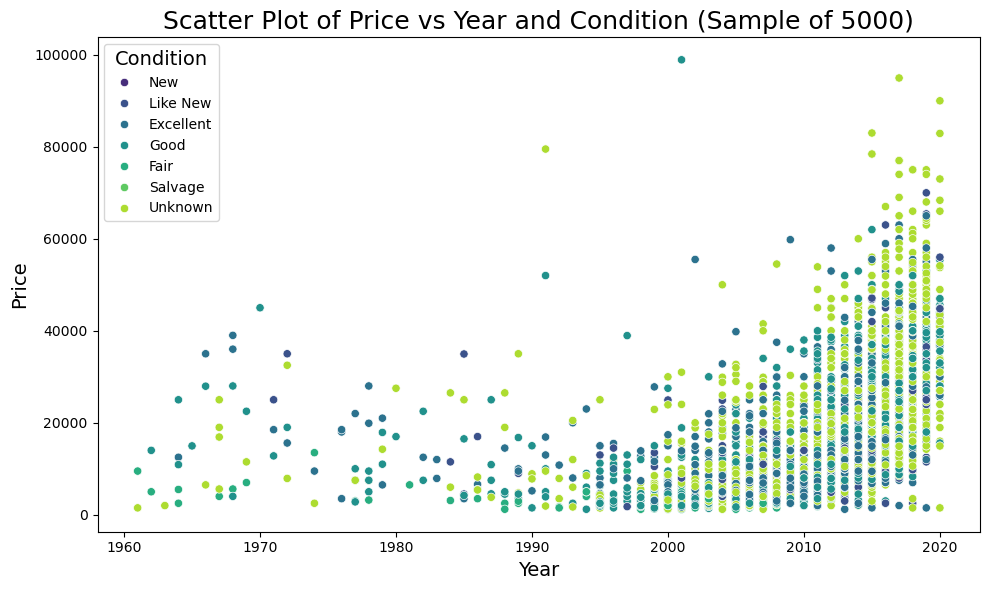

In [58]:
# Scatter plot of price vs year and condition
condition_order = ['New', 'Like New', 'Excellent', 'Good', 'Fair', 'Salvage', 'Unknown']
data_sample = data.sample(n=5000, random_state=1)
data_sample['Condition'] = pd.Categorical(data_sample['Condition'], categories=condition_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', hue='Condition', data=data_sample, palette="viridis")
plt.title('Scatter Plot of Price vs Year and Condition (Sample of 5000)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Condition', title_fontsize=14)
plt.tight_layout()
plt.savefig('images/14-scatter-price-year-condition.png', bbox_inches='tight', dpi=300)
plt.show()

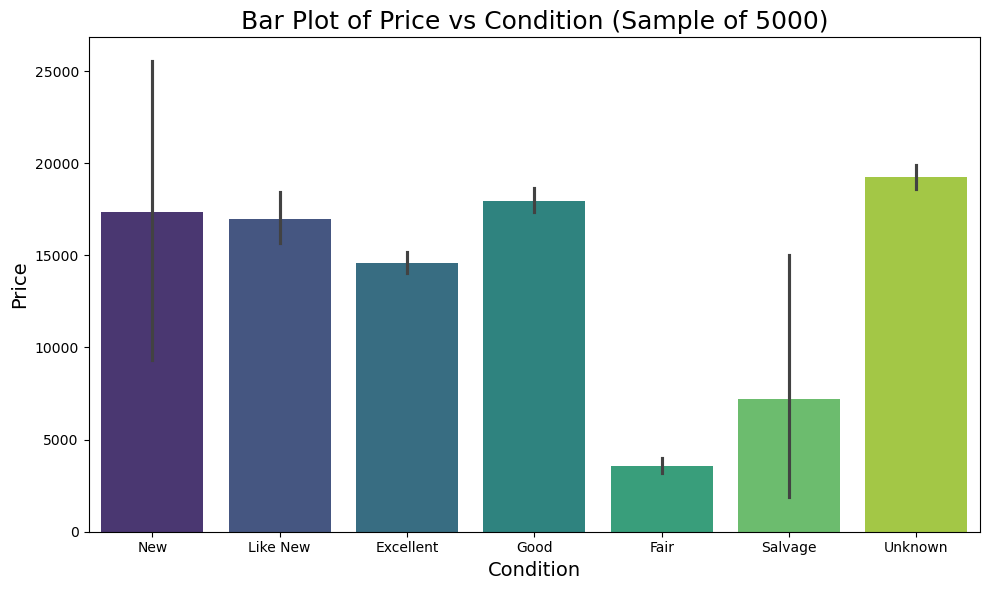

In [59]:
# Bar plot of price vs condition
condition_order = ['New', 'Like New', 'Excellent', 'Good', 'Fair', 'Salvage', 'Unknown']
data_sample = data.sample(n=5000, random_state=1)
data_sample['Condition'] = pd.Categorical(data_sample['Condition'], categories=condition_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Condition', y='Price', data=data_sample, palette="viridis")
plt.title('Bar Plot of Price vs Condition (Sample of 5000)', fontsize=18)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.savefig('images/15-bar-price-condition.png', bbox_inches='tight', dpi=300)
plt.show()

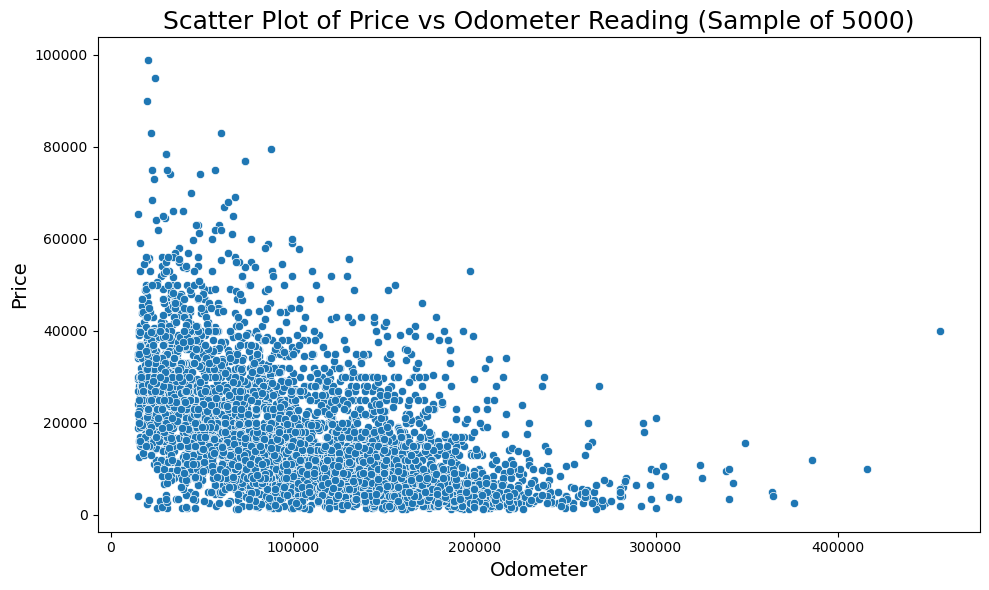

In [60]:
# Scatter plot of price vs odometer reading (5000 points)
data_sample = data.sample(n=5000, random_state=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Odometer', y='Price', data=data_sample, palette="viridis")
plt.title('Scatter Plot of Price vs Odometer Reading (Sample of 5000)', fontsize=18)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.savefig('images/16-scatter-price-odometer.png', bbox_inches='tight', dpi=300)
plt.show()

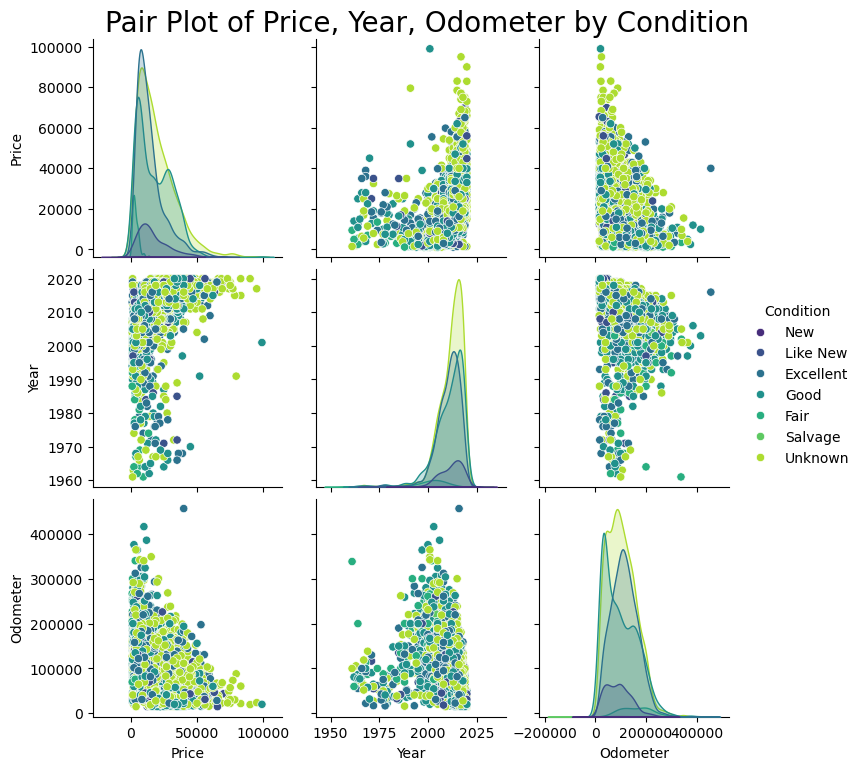

In [61]:
# Price, Year, Odometer, Condition Pair Plot
data_sample = data.sample(n=5000, random_state=1)
data_sample['Condition'] = pd.Categorical(data_sample['Condition'], categories=['New', 'Like New', 'Excellent', 'Good', 'Fair', 'Salvage', 'Unknown'], ordered=True)
sns.pairplot(data_sample, vars=['Price', 'Year', 'Odometer'], hue='Condition', palette='viridis')
plt.suptitle('Pair Plot of Price, Year, Odometer by Condition', size=20, y=1.02)
plt.savefig('images/17-pair-plot.png', bbox_inches='tight', dpi=300)
plt.show()

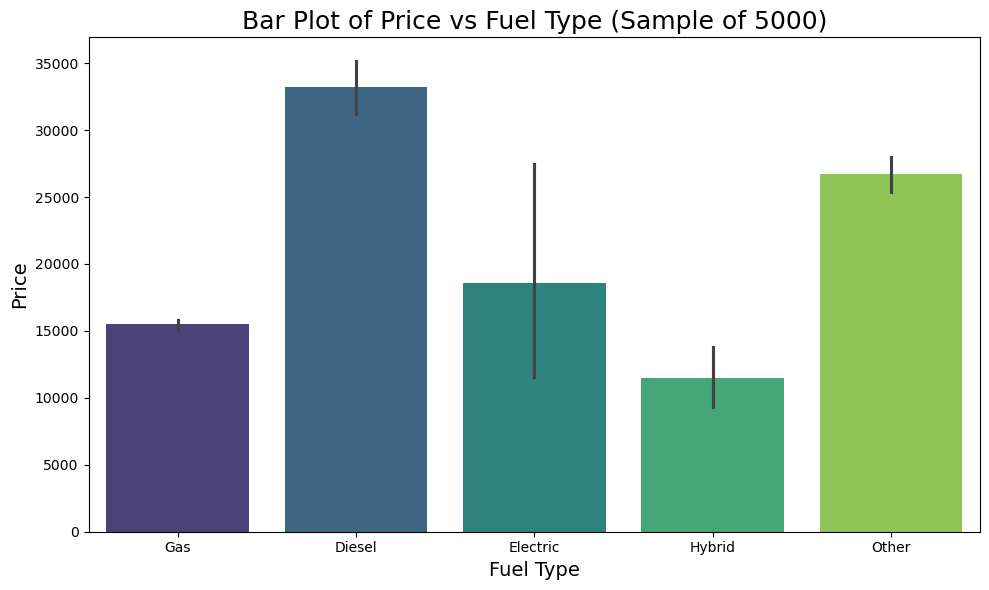

In [62]:
# Bar plot of price vs fuel type
fuel_order = ['Gas', 'Diesel', 'Electric', 'Hybrid', 'Other']
data_sample = data.sample(n=5000, random_state=1)
data_sample['Fuel'] = pd.Categorical(data_sample['Fuel'], categories=fuel_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel', y='Price', data=data_sample, palette="viridis")
plt.title('Bar Plot of Price vs Fuel Type (Sample of 5000)', fontsize=18)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.savefig('images/18-bar-price-fuel.png', bbox_inches='tight', dpi=300)
plt.show()

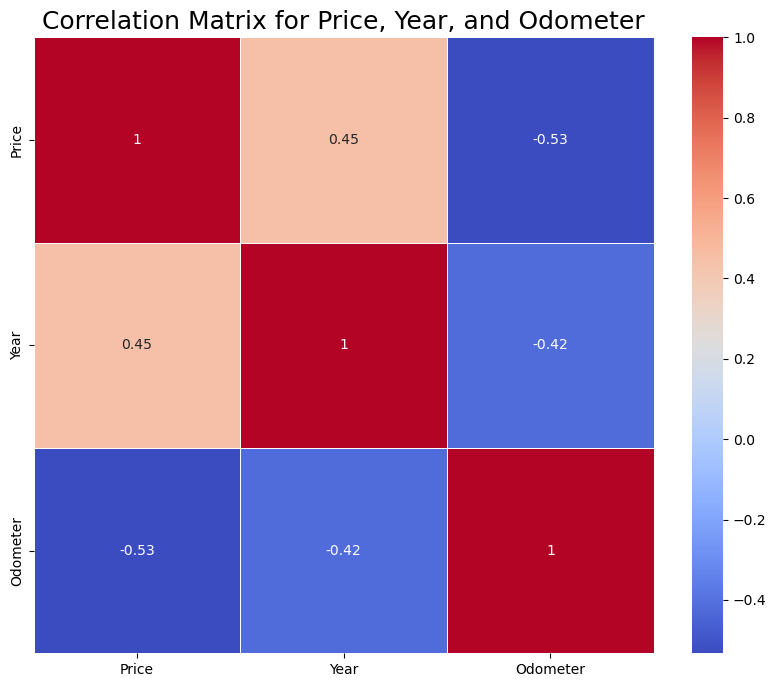

In [63]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Price', 'Year', 'Odometer']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Price, Year, and Odometer', fontsize=18)
plt.savefig('images/19-correlation-matrix.png', bbox_inches='tight', dpi=300)
plt.show()

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Analysis</b></h4>
    <ul>
        <li>Cars in the 'Salvage' or 'Fair' condition have markedly lower prices than cars in other conditions; the average prices of cars in other conditions are higher and similar. New cars have the widest range of prices, which most likely reflects the high variability in pricing for cars in different classes (for example, new luxury cars are on average much more expensive than new economy cars).</li>
        <li>As expected, there is a negative correlation between the odometer reading and the price of the car.</li>
        <li>There is a positive correlation between the year and the price of the car, which also makes sense because newer cars tend to be more expensive.</li>
        <li>There is a negative correlation between the odometer reading and the year so the older a car is, the more miles it generally has.</li>
        <li>Diesel vehicles are the most expensive, followed by other, electric, gas, then hybrid.</li>
    </ul>
</div>

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Encoding & Scaling the Dataset</b></h3>
</div>

In [64]:
# Moving price to the last column in the dataset
price_column = data.pop('Price')
data.insert(len(data.columns), 'Price', price_column)

In [65]:
# Save data to a new CSV file
data.to_csv('data/vehicles_cleaned_04.csv', index=False)

In [66]:
# Create a new dataframe with the final dataset
final_data = data.copy()

In [67]:
# Selecting categorical and numerical features for appropriate processing
categorical_features = ['Region', 'Manufacturer', 'Model', 'Condition', 'Cylinders', 'Fuel', 'TitleStatus', 'Transmission', 'Drive', 'Type', 'PaintColor', 'State']
numerical_features = ['Year', 'Odometer', 'Price']

In [68]:
# Instantiate the LabelEncoder
encoder = LabelEncoder()

In [69]:
# Perform label encoding
encoded_features = final_data[categorical_features].apply(encoder.fit_transform)

In [70]:
# Retrieve new column names from the encoder
encoded_columns = encoded_features.columns

In [71]:
# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

In [72]:
# Concatenate encoded features with the numerical columns to form the new dataframe
numerical_data = final_data[numerical_features]
encoded_df = pd.concat([encoded_df, numerical_data], axis=1)

In [73]:
encoded_df.head()

,Region,Manufacturer,Model,Condition,Cylinders,Fuel,TitleStatus,Transmission,Drive,Type,PaintColor,State,Year,Odometer,Price
27,15,14,10040,2,6,2,0,2,0,7,10,1,2014,57923,33590
28,15,7,10240,2,6,2,0,2,0,7,1,1,2010,71229,22590
29,15,7,10256,2,6,2,0,2,0,7,8,1,2020,19160,39590
30,15,36,11874,2,6,2,0,2,0,7,8,1,2017,41124,30990
31,15,13,5111,0,5,2,0,0,2,10,0,1,2013,128000,15000


In [74]:
# Create training and testing datasets
X = encoded_df.drop('Price', axis=1)
y = encoded_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = ['Year', 'Odometer']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [76]:
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (199423, 14)
y_train Shape: (199423,)
X_test Shape: (49856, 14)
y_test Shape: (49856,)


##
<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 20px 30px;">
    <h2><b>Modeling</b></h2>
    <p>With your (almost?) final dataset in hand, it is now time to build some models. Here, you should build a number of different regression models with the price as the target. In building your models, you should explore different parameters and be sure to cross-validate your findings.</p>
</div>

In [77]:
# Define a function to calculate scores for each model
def calculate_scores(y_test, y_pred):
    scores = []
    scores.append(round(r2_score(y_test, y_pred), 4))
    scores.append(round(r2_score(y_test, y_pred) * 100, 4))
    scores.append(round(mean_squared_error(y_test, y_pred), 4))
    scores.append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    scores.append(round(mean_absolute_error(y_test, y_pred), 4))
    return scores

# Store results in a dataframe
scores_df = pd.DataFrame(columns=['Model', 'R^2 Score', 'Accuracy (%)', 'Mean Squared Error', 'Root MSE', 'Mean Absolute Error'])

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Linear Regression</b></h3>
</div>

In [78]:
# Create Linear Regression model, fit and predict
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
best_linear_regression_model = linear_regression
y_pred_linear_regression = best_linear_regression_model.predict(X_test)

# Calculate scores for Linear Regression
scores_linear_regression = calculate_scores(y_test, y_pred_linear_regression)
linear_regression_row = {'Model': 'Linear Regression', 'R^2 Score': scores_linear_regression[0], 'Accuracy (%)': scores_linear_regression[1], 'Mean Squared Error': scores_linear_regression[2], 'Root MSE': scores_linear_regression[3], 'Mean Absolute Error': scores_linear_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([linear_regression_row])], ignore_index=True)

# Display scores for Linear Regression
print("Linear Regression Scores:")
print("R^2 Score:", scores_linear_regression[0])
print("Accuracy (%):", scores_linear_regression[1])
print("Mean Squared Error:", scores_linear_regression[2])
print("Root MSE:", scores_linear_regression[3])
print("Mean Absolute Error:", scores_linear_regression[4])

Linear Regression Scores:
R^2 Score: 0.5837
Accuracy (%): 58.3659
Mean Squared Error: 71342901.1198
Root MSE: 8446.4727
Mean Absolute Error: 5994.8095


###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Lasso Regression</b></h3>
</div>

In [79]:
# Create Lasso Regression model, fit and predict

# Define the range of alphas to test
alphas_lasso = np.logspace(-6, 1, 100)  # Testing 100 alphas from 10^-6 to 10^1

# Instantiate LassoCV
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42)

# Fit the LassoCV to the training data
lasso_cv.fit(X_train, y_train)

# Determine the best alpha
print("Best Alpha Using Built-in LassoCV: %f" % lasso_cv.alpha_)

# Predict on the testing set
best_lasso_regression_model = lasso_cv
y_pred_lasso_regression = best_lasso_regression_model.predict(X_test)

# Calculate scores for Lasso Regression
scores_lasso_regression = calculate_scores(y_test, y_pred_lasso_regression)
lasso_regression_row = {'Model': 'Lasso Regression', 'R^2 Score': scores_lasso_regression[0], 'Accuracy (%)': scores_lasso_regression[1], 'Mean Squared Error': scores_lasso_regression[2], 'Root MSE': scores_lasso_regression[3], 'Mean Absolute Error': scores_lasso_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([lasso_regression_row])], ignore_index=True)

# Display scores for Lasso Regression
print("Lasso Regression Scores:")
print("R^2 Score:", scores_lasso_regression[0])
print("Accuracy (%):", scores_lasso_regression[1])
print("Mean Squared Error:", scores_lasso_regression[2])
print("Root MSE:", scores_lasso_regression[3])
print("Mean Absolute Error:", scores_lasso_regression[4])

Best Alpha Using Built-in LassoCV: 0.170735
Lasso Regression Scores:
R^2 Score: 0.5837
Accuracy (%): 58.3658
Mean Squared Error: 71343018.1449
Root MSE: 8446.4796
Mean Absolute Error: 5994.8007


###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Ridge Regression</b></h3>
</div>

In [80]:
# Create Ridge Regression model, fit and predict

# Set a range of alpha to test
alphas_ridge = np.logspace(-6, 6, 13)  # Creates 13 logarithmically spaced alphas between 10^-6 and 10^6

# Instantiate RidgeCV with the alpha space and cv (cross-validation generator)
ridge_cv = RidgeCV(alphas=alphas_ridge, store_cv_values=True)

# Fit the RidgeCV model to the training data
ridge_cv.fit(X_train, y_train)

# The alpha and best score found
print("Best Alpha Using RidgeCV:", ridge_cv.alpha_)

# Predict with the best model
best_ridge_regression_model = ridge_cv
y_pred_ridge_regression = best_ridge_regression_model.predict(X_test)

# Calculate scores for Ridge Regression
scores_ridge_regression = calculate_scores(y_test, y_pred_ridge_regression)
ridge_regression_row = {'Model': 'Ridge Regression', 'R^2 Score': scores_ridge_regression[0], 'Accuracy (%)': scores_ridge_regression[1], 'Mean Squared Error': scores_ridge_regression[2], 'Root MSE': scores_ridge_regression[3], 'Mean Absolute Error': scores_ridge_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([ridge_regression_row])], ignore_index=True)

# Display scores for Ridge Regression
print("Ridge Regression Scores:")
print("R^2 Score:", scores_ridge_regression[0])
print("Accuracy (%):", scores_ridge_regression[1])
print("Mean Squared Error:", scores_ridge_regression[2])
print("Root MSE:", scores_ridge_regression[3])
print("Mean Absolute Error:", scores_ridge_regression[4])

Best Alpha Using RidgeCV: 10.0
Ridge Regression Scores:
R^2 Score: 0.5837
Accuracy (%): 58.3658
Mean Squared Error: 71343008.941
Root MSE: 8446.4791
Mean Absolute Error: 5994.8083


###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Random Forest</b></h3>
</div>

In [81]:
# Create Random Forest (Base) model, fit and predict
random_forest_base = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest_base.fit(X_train, y_train)
best_random_forest_base_model = random_forest_base
y_pred_random_forest_base = best_random_forest_base_model.predict(X_test)

# Calculate scores for Random Forest (Base)
scores_random_forest_base = calculate_scores(y_test, y_pred_random_forest_base)
random_forest_base_row = {'Model': 'Random Forest (Base)', 'R^2 Score': scores_random_forest_base[0], 'Accuracy (%)': scores_random_forest_base[1], 'Mean Squared Error': scores_random_forest_base[2], 'Root MSE': scores_random_forest_base[3], 'Mean Absolute Error': scores_random_forest_base[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([random_forest_base_row])], ignore_index=True)

# Display scores for Random Forest (Base)
print("Random Forest (Base) Scores:")
print("R^2 Score:", scores_random_forest_base[0])
print("Accuracy (%):", scores_random_forest_base[1])
print("Mean Squared Error:", scores_random_forest_base[2])
print("Root MSE:", scores_random_forest_base[3])
print("Mean Absolute Error:", scores_random_forest_base[4])

Random Forest (Base) Scores:
R^2 Score: 0.9216
Accuracy (%): 92.1583
Mean Squared Error: 13437212.4831
Root MSE: 3665.6804
Mean Absolute Error: 1988.1377


In [82]:
# Create Random Forest (Optimized) model, fit and predict
random_forest_optimized = RandomForestRegressor(random_state=42)

# Define a parameter grid to search for best parameters
parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Use GridSearchCV to search for best parameters
grid_search = GridSearchCV(estimator=random_forest_optimized, param_grid=parameter_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Use the best estimator to make predictions
best_random_forest_optimized_model = grid_search.best_estimator_
y_pred_random_forest_optimized = best_random_forest_optimized_model.predict(X_test)

# Calculate scores for Random Forest (Optimized)
scores_random_forest_optimized = calculate_scores(y_test, y_pred_random_forest_optimized)
random_forest_optimized_row = {'Model': 'Random Forest (Optimized)', 'R^2 Score': scores_random_forest_optimized[0], 'Accuracy (%)': scores_random_forest_optimized[1], 'Mean Squared Error': scores_random_forest_optimized[2], 'Root MSE': scores_random_forest_optimized[3], 'Mean Absolute Error': scores_random_forest_optimized[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([random_forest_optimized_row])], ignore_index=True)

# Display scores for Random Forest (Optimized)
print("Random Forest (Optimized) Scores:")
print("R^2 Score:", scores_random_forest_optimized[0])
print("Accuracy (%):", scores_random_forest_optimized[1])
print("Mean Squared Error:", scores_random_forest_optimized[2])
print("Root MSE:", scores_random_forest_optimized[3])
print("Mean Absolute Error:", scores_random_forest_optimized[4])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 300}
Best Score (MSE): 15497644.564743245
Random Forest (Optimized) Scores:
R^2 Score: 0.9236
Accuracy (%): 92.3588
Mean Squared Error: 13093795.3607
Root MSE: 3618.535
Mean Absolute Error: 1957.0711


##
<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 20px 30px;">
    <h2><b>Evaluation</b></h2>
    <p>With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices. Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.</p>
</div>

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Summary of Models' Performance</b></h3>
</div>

In [83]:
scores_df

,Model,R^2 Score,Accuracy (%),Mean Squared Error,Root MSE,Mean Absolute Error
0,Linear Regression,0.5837,58.3659,7.134290e+07,8446.4727,5994.8095
1,Lasso Regression,0.5837,58.3658,7.134302e+07,8446.4796,5994.8007
2,Ridge Regression,0.5837,58.3658,7.134301e+07,8446.4791,5994.8083
3,Random Forest (Base),0.9216,92.1583,1.343721e+07,3665.6804,1988.1377
4,Random Forest (Optimized),0.9236,92.3588,1.309380e+07,3618.5350,1957.0711


###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Visual Score Comparisons</b></h3>
</div>

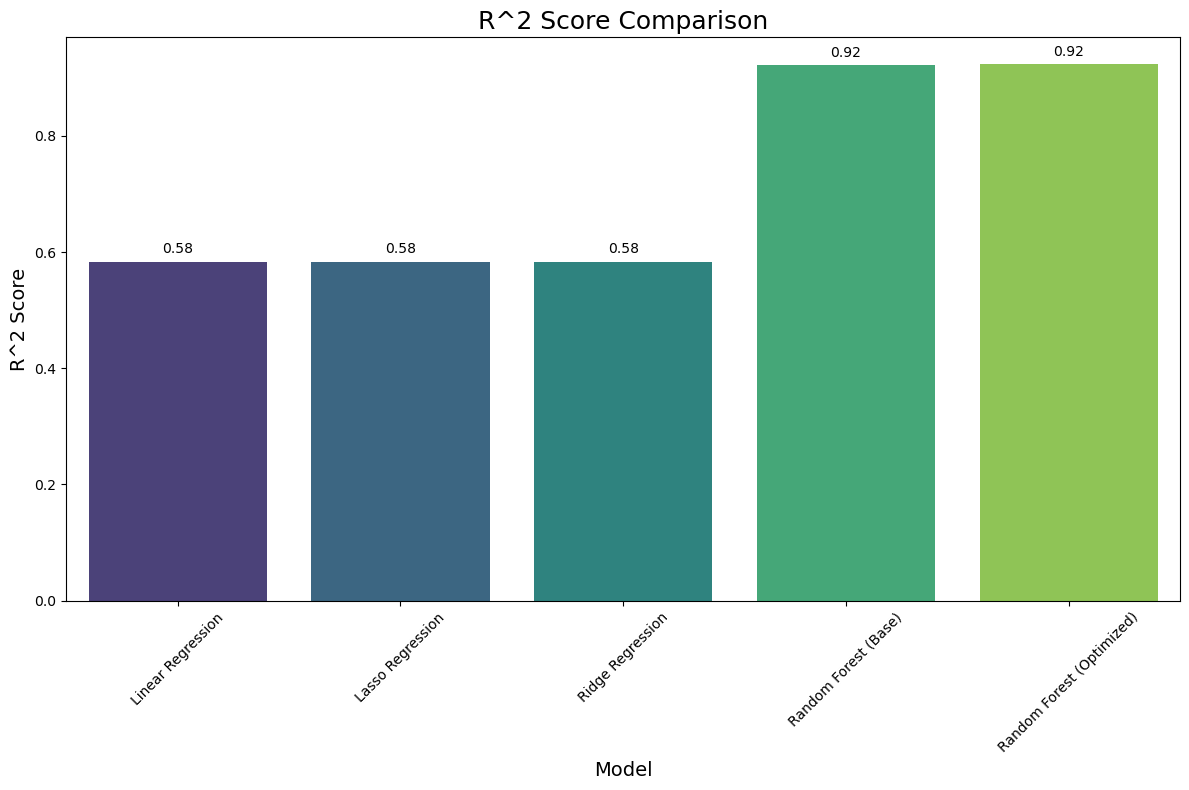

In [84]:
# R^2 Score Comparison
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Model', y='R^2 Score', data=scores_df, palette="viridis")
plt.title('R^2 Score Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R^2 Score', fontsize=14)
plt.xticks(rotation=45)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.savefig('images/20-r2-score-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

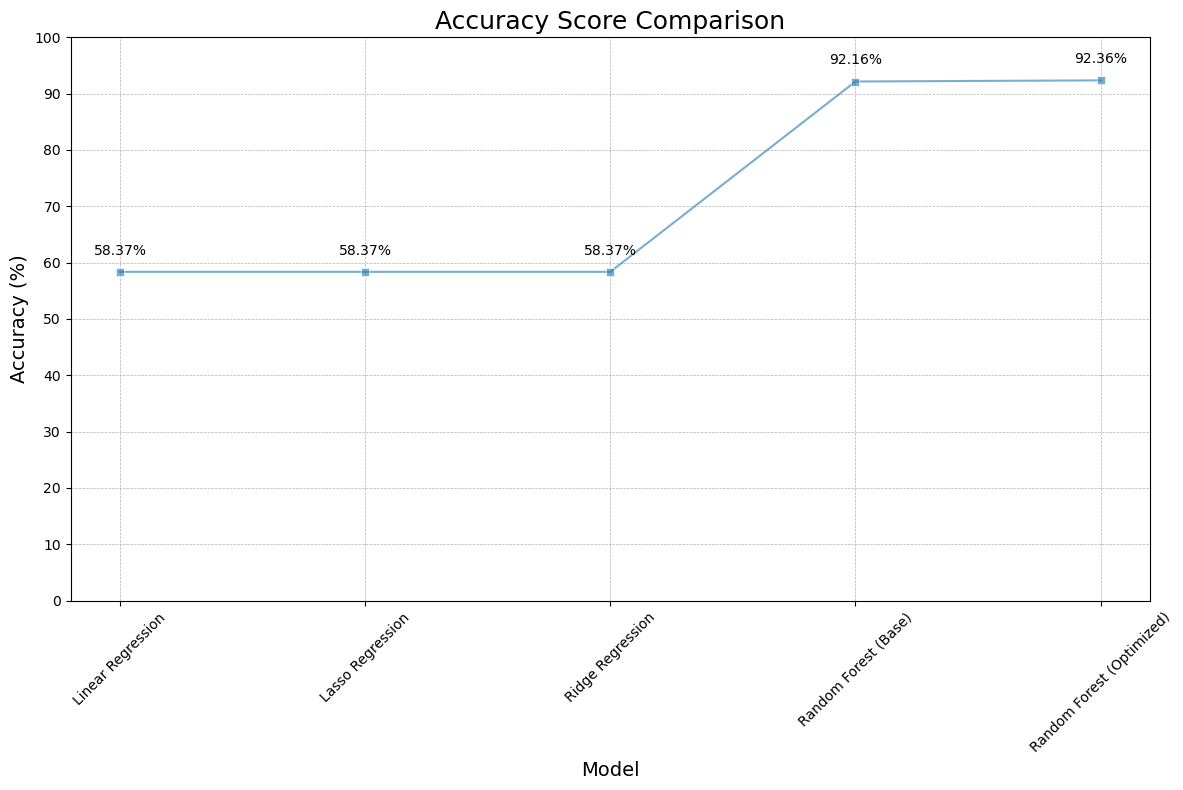

In [85]:
# Accuracy Score Comparison
plt.figure(figsize=(12, 8))
line = sns.lineplot(x='Model', y='Accuracy (%)', data=scores_df, palette="viridis", marker="s", alpha=0.6)
plt.title('Accuracy Score Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for x, y in zip(range(len(scores_df['Model'])), scores_df['Accuracy (%)']):
    plt.text(x, y + 2.5, f'{y:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('images/21-accuracy-score-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

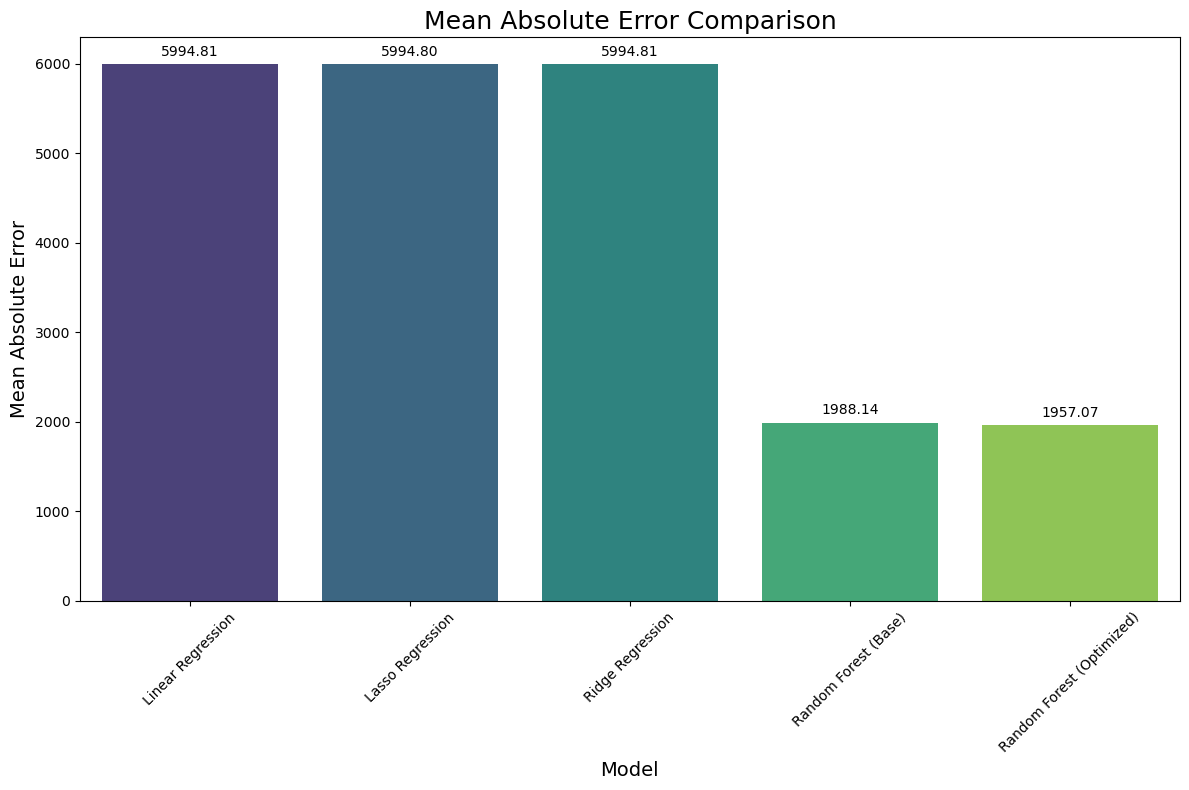

In [86]:
# Mean Absolute Error Comparison
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Model', y='Mean Absolute Error', data=scores_df, palette="viridis")
plt.title('Mean Absolute Error Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.xticks(rotation=45)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.savefig('images/22-mean-absolute-error-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Testing Best Model on Sample Data</b></h3>
</div>

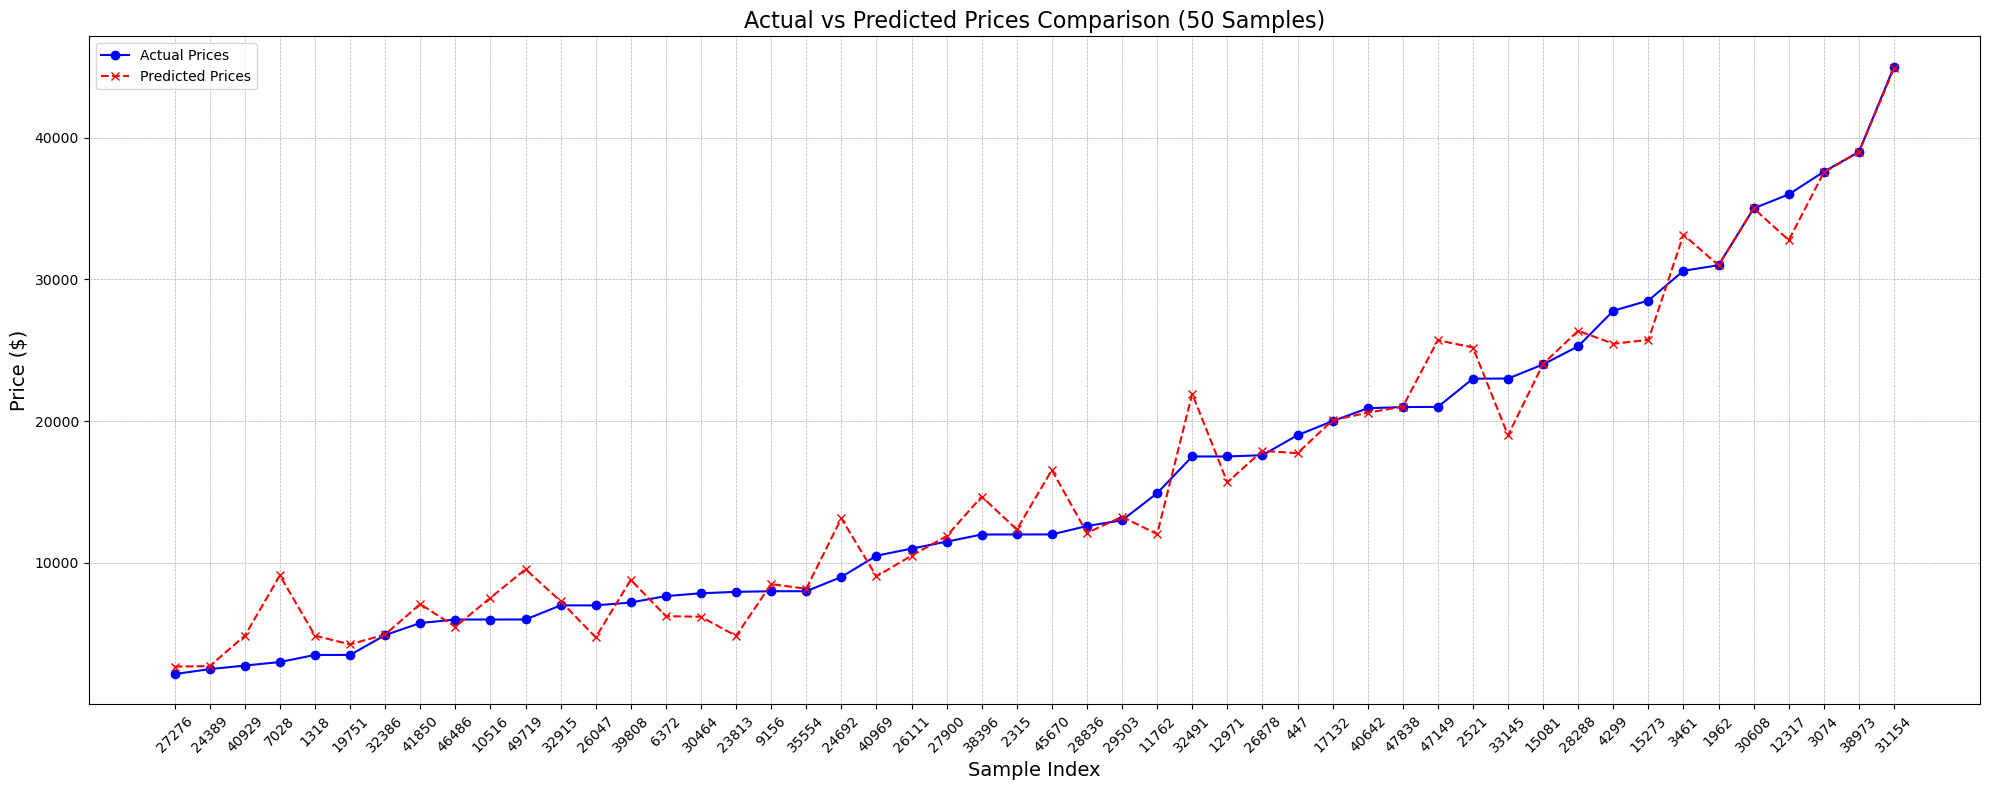

In [87]:
# Plot of actual vs predicted prices for the Random Forest (Optimized) model (50 samples)

# Selecting 50 random samples for plotting
samples_index = np.random.choice(len(y_pred_random_forest_optimized), 50, replace=False)
actual_samples = y_test.iloc[samples_index]
predicted_samples = y_pred_random_forest_optimized[samples_index]

# Sorting the samples by actual prices
sorted_indices = actual_samples.argsort()
sorted_actual_samples = actual_samples.values[sorted_indices]
sorted_predicted_samples = predicted_samples[sorted_indices]

# Plotting both actual and predicted prices
plt.figure(figsize=(20, 8))
plt.plot(sorted_actual_samples, label='Actual Prices', color='blue', marker='o')
plt.plot(sorted_predicted_samples, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Prices Comparison (50 Samples)', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(range(50), labels=[str(samples_index[i]) for i in sorted_indices], rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/23-actual-vs-predicted-prices-comparison.png')
plt.show()

###
<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Feature Importances</b></h3>
</div>

In [88]:
# Calculate feature importances
features = []
importances = []
for name, importance in zip(X, best_random_forest_optimized_model.feature_importances_):
    features.append(name)
    importances.append(round(importance * 100, 2))

features = pd.DataFrame({'Features': features, 'Importance (%)': importances})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
12,Year,38.85
4,Cylinders,19.58
13,Odometer,13.92
5,Fuel,8.13
2,Model,5.51
1,Manufacturer,3.40
8,Drive,3.02
9,Type,1.89
11,State,1.37
0,Region,1.23


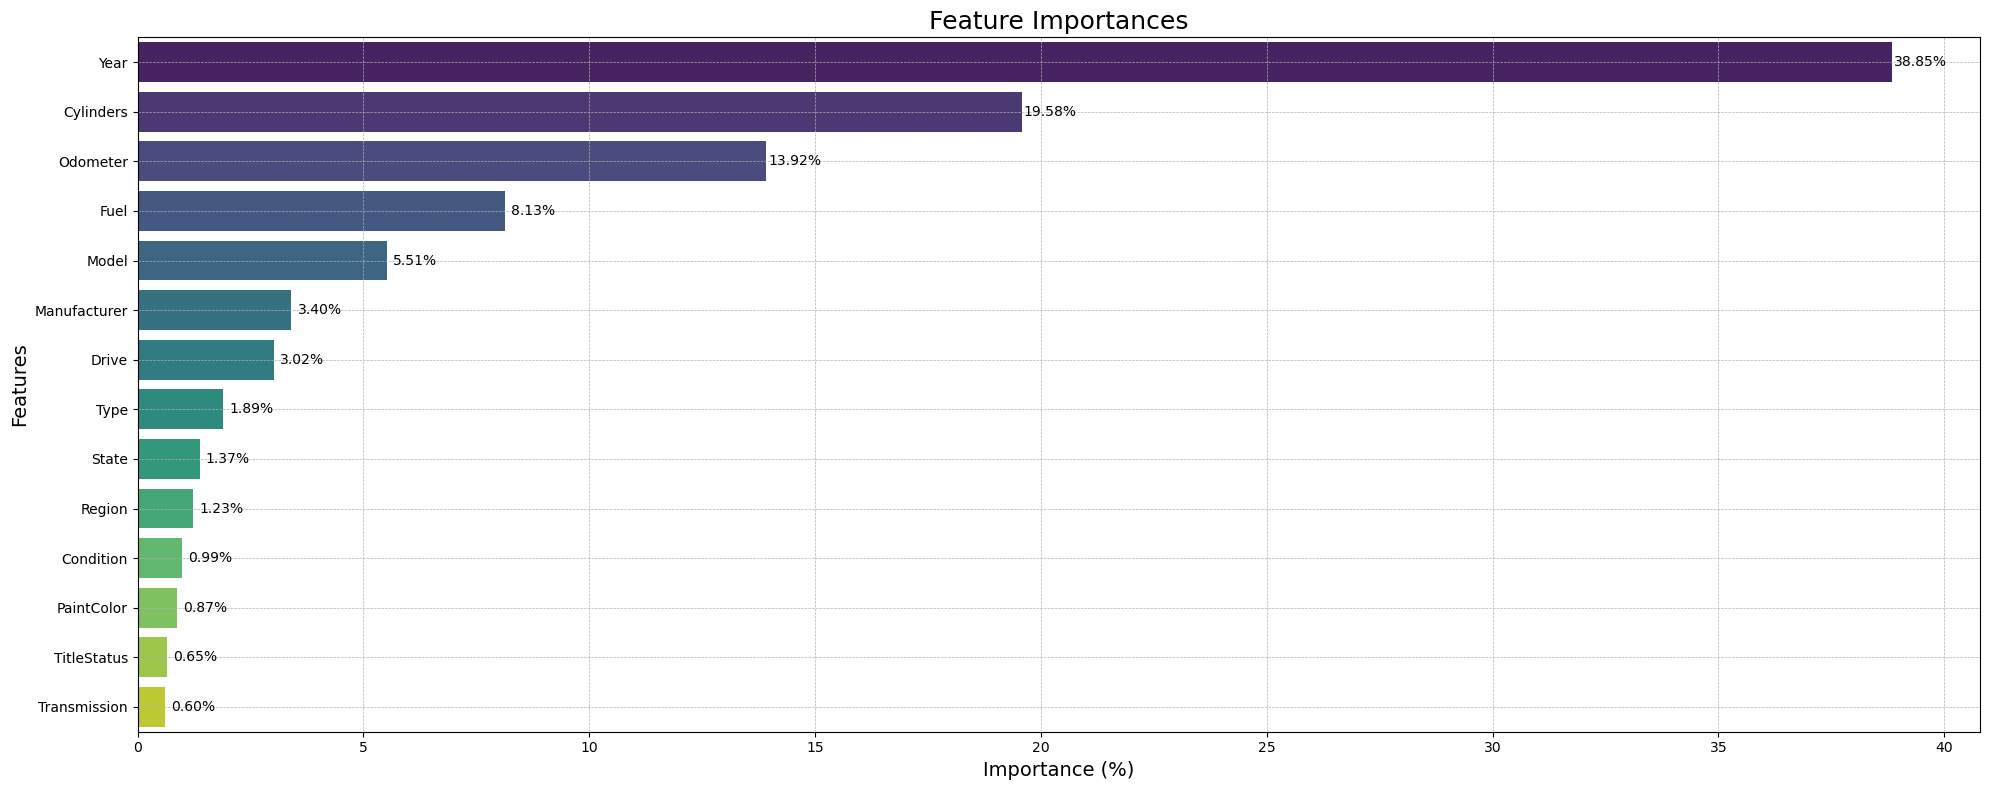

In [89]:
# Plot feature importances
plt.figure(figsize=(20, 8))
# Sorting the features dataframe by 'Importance (%)' in descending order before plotting
features_sorted = features.sort_values(by='Importance (%)', ascending=False)
barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for p in barplot.patches:
    barplot.annotate(f"{format(p.get_width(), '.2f')}%", (p.get_width() + 0.35, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')
plt.tight_layout()
plt.savefig('images/24-feature-importances.png')
plt.show()

##
<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 20px 30px;">
    <h2><b>Deployment</b></h2>
    <p>Now that we've settled on our models and findings, it is time to deliver the information to the client. You should organize your work as a basic report that details your primary findings. Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.</p>
</div>